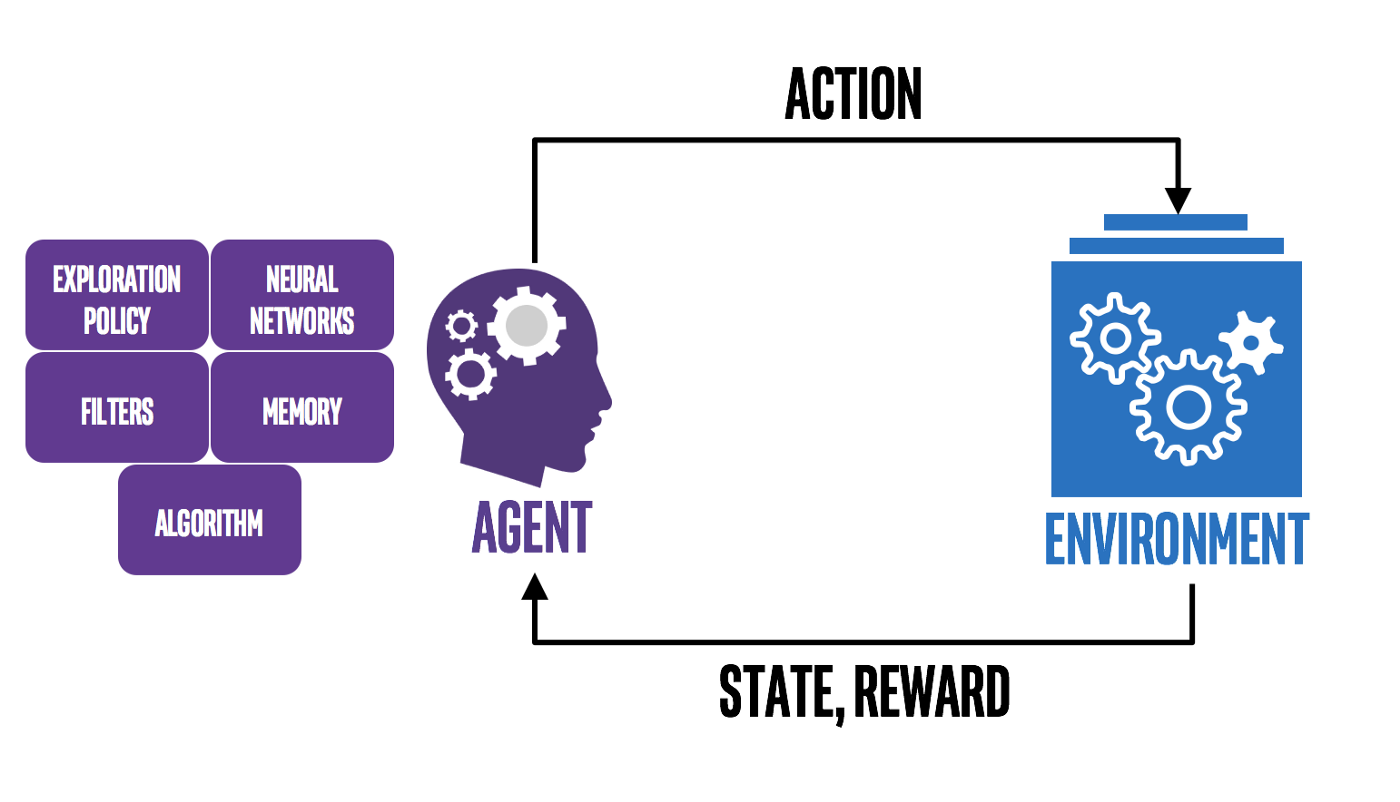

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

%matplotlib inline

# Basic RL psuedo code

$Q(S, A)$: discounted value of each state action pair

$r$: reward

$\alpha$: learning rate

$\lambda$: discount factor

$\pi$: policy mapping Q table to action

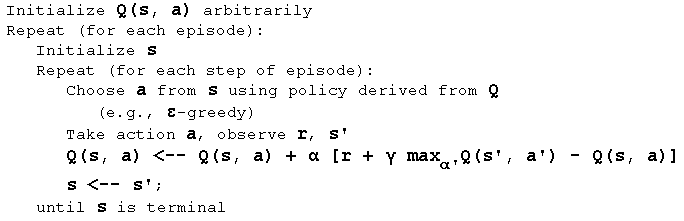

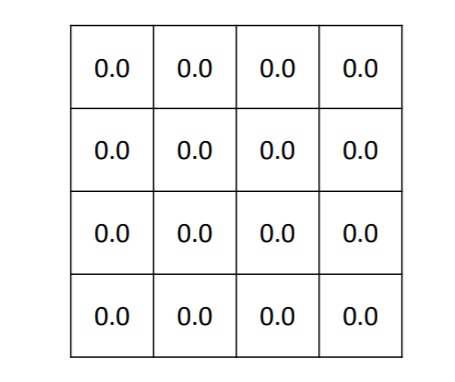

In [84]:
#starting over with a reduced example

class TabularEnvironment:
    def __init__(self, grid):
        self.states = grid
        self.rewards = np.zeros_like(grid)
        
        env_size = grid.shape[0]
        self.rewards[np.random.randint(env_size), np.random.randint(env_size)] = 1
    
    def interact(self, agent, act):
        action= agent.actions[act]
        
        newx = agent.x + action[0]
        newy = agent.y + action[1]
        
        if newx <0 or newx>= self.states.shape[0]:
            newx = agent.x
        
        if newy <0 or newy>= self.states.shape[1]:
            newy = agent.y
            
        agent.x = newx
        agent.y = newy
        
        return [agent.x, agent.y]
        
    
    def get_reward(self, agent):
        return self.rewards[agent.x, agent.y]
    
    def advance(self, agent, epsilon):
        state = [agent.x, agent.y]
        act = agent.advance(state, epsilon)
        next_state = self.interact(agent, act)
        reward = self.get_reward(agent)
        
        agent.update_Qtable(state, act, reward, next_state)
        
    
class TabularAgent:
    def __init__(self, grid):
       
        self.x = np.random.randint(grid.shape[0])
        self.y = np.random.randint(grid.shape[1])
        
        self.actions =  [[i, j] for i, j in product([-1, 0, 1], [-1, 0, 1])]

        self.Q_table = np.zeros([grid.shape[0], grid.shape[1], len(self.actions)])
        
    def choose_action(self, state, epsilon = 1):
        
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(len(self.actions))
            
        else:
            action = np.argmax(self.Q_table[state[0], state[1]])
            
            
        return action
    
    def update_Qtable(self, state,  act, reward, new_state, lr = .1, discount = .99):

        act = int(act)
        
        oldQ = self.Q_table[state[0], state[1], act]
        
        nextQ = discount*np.max(agent.Q_table[new_state[0], new_state[1]])
        
        self.Q_table[state[0], state[1], act]= self.Q_table[state[0], state[1], act] + lr*(reward + nextQ - oldQ)
        
    
    def advance(self, state, epsilon):
        action = self.choose_action(state, epsilon)
        return action

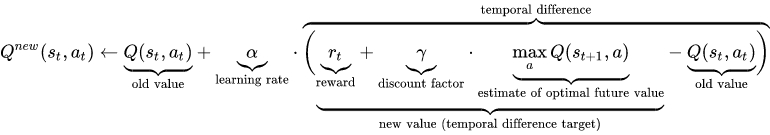

# gridworld environment

with S being the current state, A the current action, S′ the state after doing A, α being the learning rate, γ being the discount factor, and maxaQ(S′,a) the highest Q value of any move in the next state S′, i.e. the Q value of the best move in the following state.

In [88]:
x_dim, y_dim = 10, 10

grid = np.zeros([x_dim, y_dim])*np.nan

env = TabularEnvironment(grid)
agent = TabularAgent(grid)

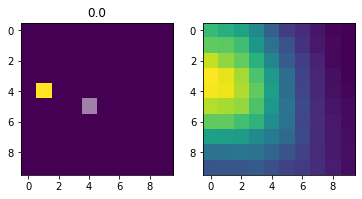

In [97]:
for i in range(5000):
    env.advance(agent, epsilon = 1)

    if np.mod(i, 100) == 0:
        grid = np.zeros([x_dim, y_dim])*np.nan
        grid[agent.x, agent.y] = 2
        plt.subplot(121)
        plt.imshow(env.rewards)
        plt.imshow(grid, alpha = .5, cmap = 'Greys')
        plt.title(env.get_reward(agent))
        plt.subplot(122)
        plt.imshow(agent.Q_table.mean(axis= 2))

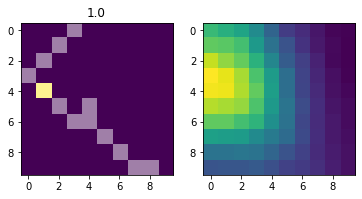

In [122]:
#agent.x, agent.y = 9, 9
env.advance(agent, epsilon = 0)


grid[agent.x, agent.y] = 2

plt.subplot(121)
plt.imshow(env.rewards)
plt.imshow(grid, alpha = .5, cmap = 'Greys')
plt.title(env.get_reward(agent))
plt.subplot(122)
plt.imshow(agent.Q_table.mean(axis= 2))